In [1]:
# Portfolio selection using riskfolio library 
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import riskfolio as hc

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2019-01-01'
end = '2023-11-12'

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2019-01-01'
end = '2023-11-12'

# Tickers of assets
assets = ['AAPL', 'GOOGL', 'IBM', 'TSLA', 'QCOM', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

tech_assets = ['AAPL', 'MSFT', 'HPQ', 'GOOGL', 'AMZN', 'FB', 'INTC', 'IBM', 
               'NVDA', 'AMD', 'ORCL', 'CSCO', 'V', 'PYPL', 'CRM', 'ADBE', 'TSLA', 'NFLX', 'SAP', 'TXN', 'QCOM', 'MU', 'AMAT', 'NOW', 'ADSK']

# Example with some popular tech stocks

# Feel free to customize this list further based on your preferences

assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets
# Calculating returns
Y = data[assets].pct_change().dropna()

display(Y.head())

# Building the portfolio object
port = hc.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HERC' # Could be HRP or HERC
correlation = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      correlation=correlation,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)


[*********************100%%**********************]  25 of 25 completed


,AAPL,APA,BA,BAX,BMY,CNP,DE,GOOGL,HPQ,IBM,...,PCAR,PSA,QCOM,SEE,T,TMO,TSLA,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-9.9607%,0.2582%,-3.9869%,-1.2557%,-13.2642%,0.5715%,-2.7346%,-2.7696%,-3.3931%,-1.9963%,...,-2.3159%,1.9174%,-2.9617%,-1.6705%,0.1354%,-3.3041%,-3.1472%,-2.5385%,0.3570%,-0.5531%
2019-01-04,4.2689%,4.1942%,5.2042%,3.1328%,3.9229%,1.8466%,5.2968%,5.1294%,3.9639%,3.9057%,...,4.4409%,-1.1066%,1.6158%,2.0732%,2.5693%,4.5199%,5.7697%,4.3633%,0.2490%,3.0713%
2019-01-07,-0.2226%,2.1540%,0.3149%,-0.4963%,3.2416%,0.3835%,1.6350%,-0.1994%,1.1100%,0.7075%,...,-0.1185%,-0.2798%,-0.2827%,0.3103%,1.8128%,1.3483%,5.4361%,-0.9599%,0.6388%,0.3989%
2019-01-08,1.9063%,1.4863%,3.7853%,-0.2720%,-0.8676%,1.9104%,1.7903%,0.8783%,1.2410%,1.4219%,...,0.9667%,1.7955%,-0.8682%,1.3779%,1.2625%,2.3270%,0.1164%,2.4122%,2.9267%,0.9114%
2019-01-09,1.6982%,5.1090%,0.9691%,1.7124%,-1.6879%,-1.2270%,-1.6505%,-0.3427%,0.0000%,0.7177%,...,-1.5118%,-0.6965%,1.1796%,-2.1637%,-1.6493%,2.7872%,0.9483%,-0.5678%,-1.2583%,0.8569%


,AAPL,APA,BA,BAX,BMY,CNP,DE,GOOGL,HPQ,IBM,...,PCAR,PSA,QCOM,SEE,T,TMO,TSLA,TXT,VZ,ZION
weights,3.6257%,1.7512%,3.5337%,1.3376%,2.0756%,0.2700%,8.0634%,3.7570%,6.1191%,13.0529%,...,12.3363%,0.4290%,2.1605%,6.9515%,0.5296%,1.3567%,0.9046%,5.6954%,0.8713%,4.2101%


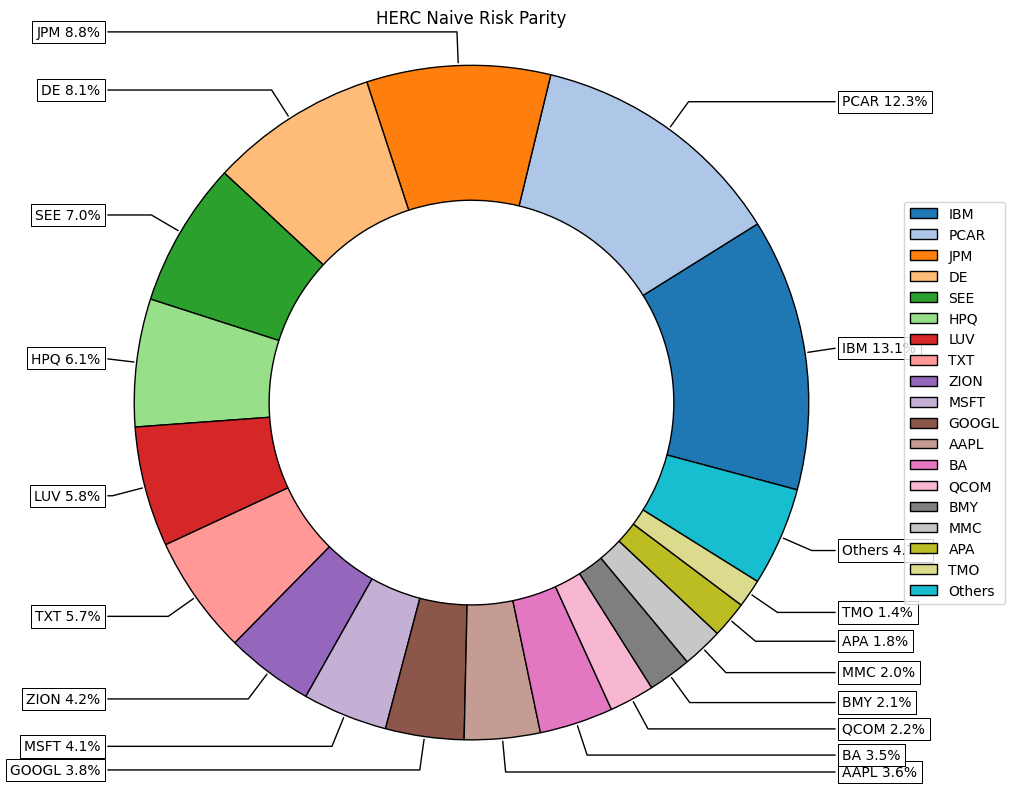

In [3]:
from riskfolio import PlotFunctions as plf
# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w,
                  title='HERC Naive Risk Parity',
                  others=0.05,
                  nrow=25,
                  cmap="tab20",
                  height=8,
                  width=10,
                  ax=None)